In [53]:

library(tidyverse)
library(skimr)
library(janitor)
library(lubridate)
library(readr)
library(readxl)
library(dplyr) 
library(ggplot2)
library(geosphere)
library(hms)

In [54]:
jan22_df  <-read.csv("/kaggle/input/capstone-projects/202201-divvy-tripdata.csv")
feb22_df <- read.csv ("/kaggle/input/capstone-projects/202202-divvy-tripdata.csv")
mar22_df <- read_csv("/kaggle/input/capstone-projects/202203-divvy-tripdata.csv")
apr22_df <- read_csv("/kaggle/input/capstone-projects/202204-divvy-tripdata.csv")
may22_df <- read_csv("/kaggle/input/capstone-projects/202205-divvy-tripdata.csv")
jun22_df <- read_csv("/kaggle/input/capstone-projects/202206-divvy-tripdata.csv")
jul22_df <- read_csv("/kaggle/input/capstone-projects/202207-divvy-tripdata.csv")
aug22_df <- read_csv("/kaggle/input/capstone-projects/202208-divvy-tripdata.csv")
sep22_df <- read_csv("/kaggle/input/capstone-projects/202209-divvy-tripdata.csv")
oct22_df <- read_csv("/kaggle/input/capstone-projects/202210-divvy-tripdata.csv")
nov22_df <- read_csv("/kaggle/input/capstone-projects/202211-divvy-tripdata.csv")
dec22_df <- read_csv("/kaggle/input/capstone-projects/202212-divvy-tripdata.csv")

Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 634858 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [55]:
#put them all into one year view (binding by rows)
Total_trips <- rbind(jan22_df, feb22_df, mar22_df, apr22_df, may22_df, jun22_df, jul22_df, aug22_df, sep22_df, oct22_df, nov22_df, dec22_df)

colnames(Total_trips)
nrow(Total_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5667717

In [56]:
#how to find inconsistent column names 
unique_cols <- unique(unlist(lapply(Total_trips, colnames)))
inconsistent_cols <- c()
for (df in Total_trips) {
  inconsistent_cols <- c(inconsistent_cols, setdiff(unique_cols, colnames(df)))
}
# print the inconsistent column names
if (length(inconsistent_cols) > 0) {
  print(paste0("Inconsistent column names found: ", paste(inconsistent_cols, collapse = ", ")))
} else {
  print("No inconsistent column names found.")
}

[1] "No inconsistent column names found."


In [57]:
col_types <- str(jan22_df)
# Check if column types of other data frames match jan22_df
if (identical(str(feb22_df), col_types) &&
    identical(str(mar22_df), col_types) &&
    identical(str(apr22_df), col_types) &&
    identical(str(may22_df), col_types) &&
    identical(str(jun22_df), col_types) &&
    identical(str(jul22_df), col_types) &&
    identical(str(aug22_df), col_types) &&
    identical(str(sep22_df), col_types) &&
    identical(str(oct22_df), col_types) &&
    identical(str(nov22_df), col_types) &&
    identical(str(dec22_df), col_types)) {
  # All column types match
  cat("All column types match the first data frame (jan22_df).")
} else {
  # Column types do not match
  cat("Column types do not match the first data frame (jan22_df).")
}

'data.frame':	103770 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num

In [58]:
#Add Columns for Date, Month, Day,Year and Day of Week
Total_trips$date <- as.Date(Total_trips$started_at) #The default format is yyyy-mm-dd
Total_trips$month <- format(as.Date(Total_trips$date), "%m")
Total_trips$day <- format(as.Date(Total_trips$date), "%d")
Total_trips$year <- format(as.Date(Total_trips$date), "%Y")
Total_trips$day_of_week <- format(as.Date(Total_trips$date), "%A")

colnames(Total_trips)
head(Total_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,01,13,2022,Thursday
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,01,10,2022,Monday
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,01,25,2022,Tuesday
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,01,04,2022,Tuesday
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,01,20,2022,Thursday
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,01,11,2022,Tuesday


In [59]:
# Convert 'started_at' column to POSIXct type with the correct format
Total_trips$started_at <- as.POSIXct(strptime(Total_trips$started_at, format = "%Y-%m-%d %H:%M:%S"))
#strptime() function is used to convert the 'started_at' column to POSIXlt type with the specified format ("%Y-%m-%d %H:%M:%S"). Then, the as.POSIXct() function converts the POSIXlt object to POSIXct type.
# Format time as HH:MM:SS
Total_trips$time <- format(Total_trips$started_at, "%H:%M:%S")

# Create a new column for time
Total_trips$time <- as_hms(Total_trips$time)

# Create a new column for hour
Total_trips$hour <- hour(Total_trips$time)

colnames(Total_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "time"               "hour"

In [60]:
# Convert the columns to POSIXct type
Total_trips$started_at <- as.POSIXct(Total_trips$started_at, format = "%Y-%m-%d %H:%M:%S")
Total_trips$ended_at <- as.POSIXct(Total_trips$ended_at, format = "%Y-%m-%d %H:%M:%S")

# Calculate the difference in minutes
Total_trips$ride_length <- as.numeric(difftime(Total_trips$ended_at, Total_trips$started_at, units = "mins"))
colnames(Total_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "time"               "hour"               "ride_length"

In [61]:
Total_trips['distance'] <- (distGeo(matrix(c(Total_trips$start_lng, Total_trips$start_lat), ncol=2),matrix(c(Total_trips$end_lng, Total_trips$end_lat), ncol=2))/1000.0)

Total_trips["oneway_round"] <- case_when(Total_trips$distance == 0.0 ~ "round",Total_trips$distance > 0.0 ~ "one_way")


colnames(Total_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "time"               "hour"               "ride_length"       
[22] "distance"           "oneway_round"

In [62]:
#----------------Summaries--------------
#Total # of rides
nrow(Total_trips)

#Total # of rides by member types
table(Total_trips$member_casual)


#Bike type
table(Total_trips$rideable_type)

[1] 5667717


 casual  member 
2322032 3345685 


 classic_bike   docked_bike electric_bike 
      2601214        177474       2889029 

In [63]:
#Clean Columns we dont need 0 or neg, duplicates, NA values
Total_trips <- na.omit(Total_trips) #remove rows with NA values
Total_trips <- distinct(Total_trips) #remove duplicate rows 
Total_trips <- Total_trips[!(Total_trips$ride_length <=0),] #remove where ride_length is 0 or negative
#remove columns not needed: ride_id, start_station_id, end_station_id, start_lat, start_long, end_lat, end_lng
Total_trips <- Total_trips %>%  
  select(-c(ride_id, start_station_id, end_station_id,start_lat,start_lng,end_lat,end_lng))

In [64]:
colnames(Total_trips)

[1] "rideable_type"      "started_at"         "ended_at"          
 [4] "start_station_name" "end_station_name"   "member_casual"     
 [7] "date"               "month"              "day"               
[10] "year"               "day_of_week"        "time"              
[13] "hour"               "ride_length"        "distance"          
[16] "oneway_round"

In [65]:
#----------------Summaries--------------
#Total # of rides
nrow(Total_trips)

#Total # of rides by member types
table(Total_trips$member_casual)


#Bike type
table(Total_trips$rideable_type)

[1] 219206


casual member 
 39819 179387 


 classic_bike   docked_bike electric_bike 
       114349          2287        102570 

In [66]:
#Bike type by Member type
table_by_member_bike <- table(Total_trips$member_casual, Total_trips$rideable_type)

# Set the dimnames of the table to label the rows and columns
dimnames(table_by_member_bike) <- list(c("Casual", "Member"), c("Classic Bike", "Docked Bike", "Electric Bike"))

# Print the table
print(table_by_member_bike)

       Classic Bike Docked Bike Electric Bike
Casual        15003        2287         22529
Member        99346           0         80041


In [67]:
#day of week
Total_trips %>%
  group_by(member_casual) %>%
  count (day_of_week)

member_casual,day_of_week,n
<chr>,<chr>,<int>
casual,Friday,5135
casual,Monday,6820
casual,Saturday,6588
casual,Sunday,6706
casual,Thursday,4407
casual,Tuesday,5165
casual,Wednesday,4998
member,Friday,23304
member,Monday,31744


In [68]:
#which months
Total_trips %>%
  group_by(member_casual) %>% 
  count(month) %>% 
  print(n = 24)

# A tibble: 4 × 3
# Groups:   member_casual [2]
  member_casual month     n
  <chr>         <chr> <int>
1 casual        01    18460
2 casual        02    21359
3 member        01    85219
4 member        02    94168


In [69]:
#------------Average
#average of ride_length
Avg_Ride_length <- mean(Total_trips$ride_length)
print(Avg_Ride_length)

[1] 13.41736


In [70]:
#average ride length by member type
Total_trips %>%
  group_by(member_casual) %>%
  summarise_at(vars(ride_length),
               list(time = mean))

member_casual,time
<chr>,<dbl>
casual,22.85745
member,11.32192


In [71]:
#average ride_length by bike type
Total_trips %>% group_by(rideable_type) %>% 
  summarise_at(vars(ride_length),
               list(time = mean))

rideable_type,time
<chr>,<dbl>
classic_bike,13.49492
docked_bike,114.16060
electric_bike,11.08463


In [72]:
#average ride_length by member type at each hour
Total_trips %>% 
group_by(hour, member_casual) %>% 
  summarise_at(vars(ride_length),
               list(time = mean)) %>% 
  print(n=48) 

# A tibble: 48 × 3
# Groups:   hour [24]
    hour member_casual  time
   <int> <chr>         <dbl>
 1     0 casual         14.4
 2     0 member         12.7
 3     1 casual         63.1
 4     1 member         11.6
 5     2 casual         27.3
 6     2 member         13.1
 7     3 casual         19.1
 8     3 member         10.2
 9     4 casual         18.0
10     4 member         11.3
11     5 casual         14.3
12     5 member         10.3
13     6 casual         28.1
14     6 member         10.7
15     7 casual         13.3
16     7 member         11.2
17     8 casual         19.4
18     8 member         10.8
19     9 casual         17.5
20     9 member         10.5
21    10 casual         25.9
22    10 member         10.8
23    11 casual         24.0
24    11 member         11.3
25    12 casual         19.9
26    12 member         10.5
27    13 casual         23.3
28    13 member         10.7
29    14 casual         24.5
30    14 member         11.0
31    15 casual         27.0
32

# **Graphing**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


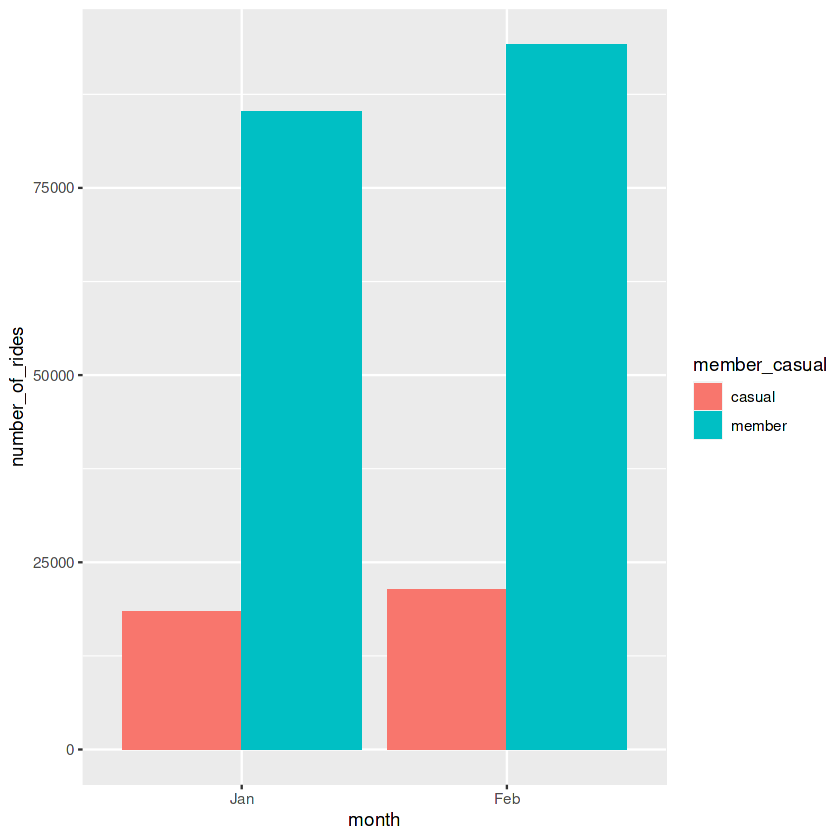

In [73]:
#Plot1 is Number of Rides in each month by member types

Total_trips %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


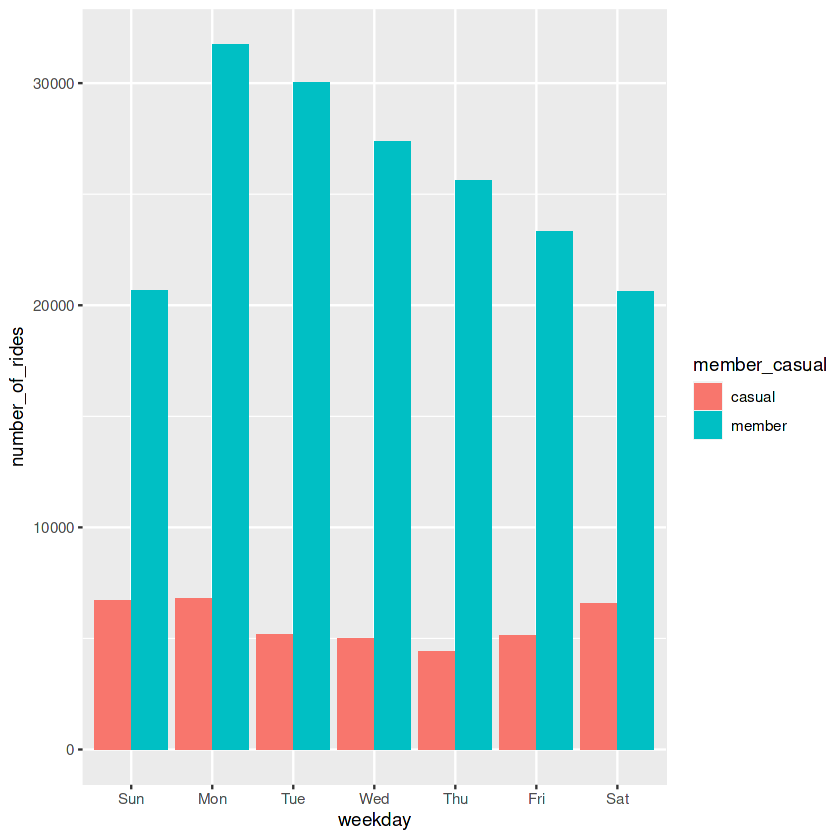

In [74]:
#Plot2 is Number of Rides each day by member types

Total_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


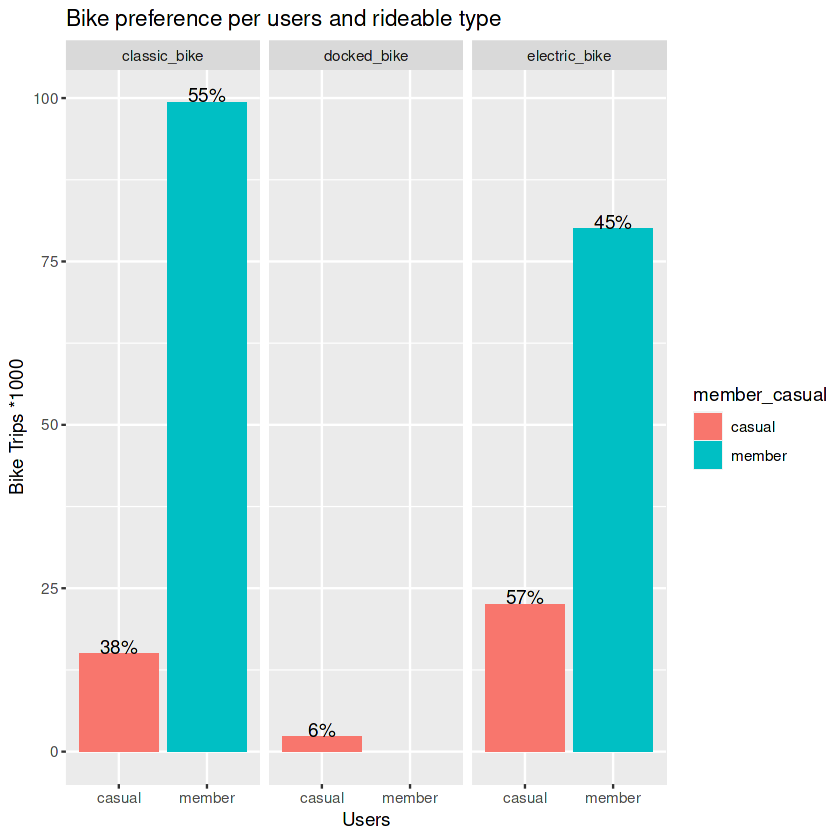

In [75]:
#Plot3 is Bike Trips preference per user types and rideable types
  ggplot(
  Total_trips%>%
    group_by(member_casual, rideable_type) %>%
    summarise(n = n())%>%
    mutate(percentage = n/sum(n) *100) ,
  aes(x=member_casual, y=n/1000, fill=member_casual)
) + 
  geom_col(position="dodge") +
  geom_text(aes(label = paste0(round(percentage), "%")), position=position_dodge(0.85), vjust = 0) +
  labs(x="Users", y="Bike Trips *1000", title="Bike preference per users and rideable type")+
  facet_wrap(~rideable_type)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


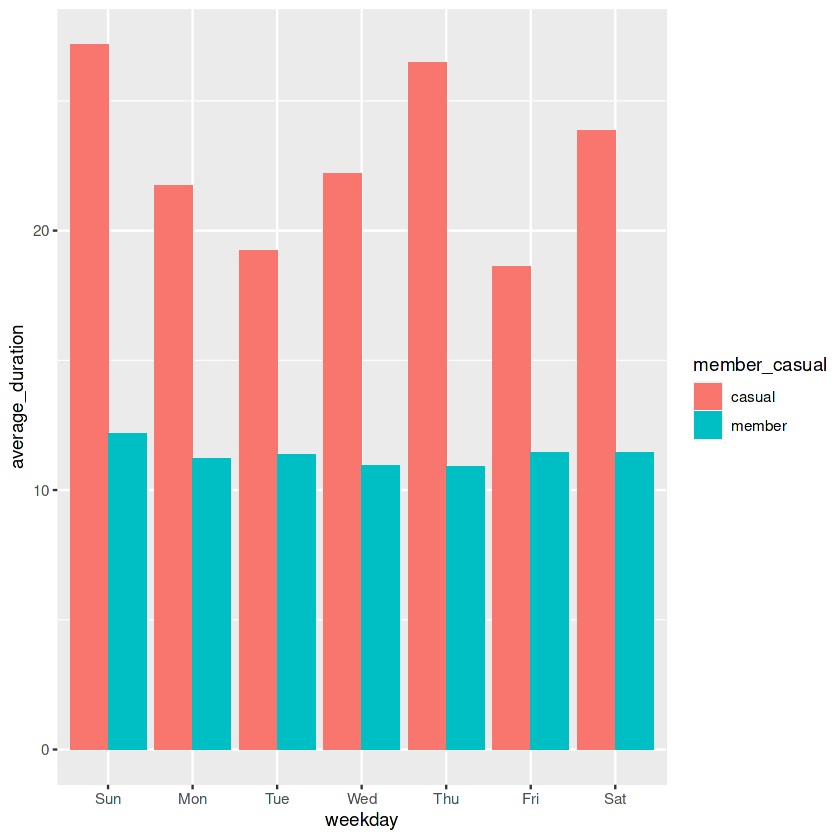

In [76]:
#Plot4 is average duration each day by member types
Total_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")
  


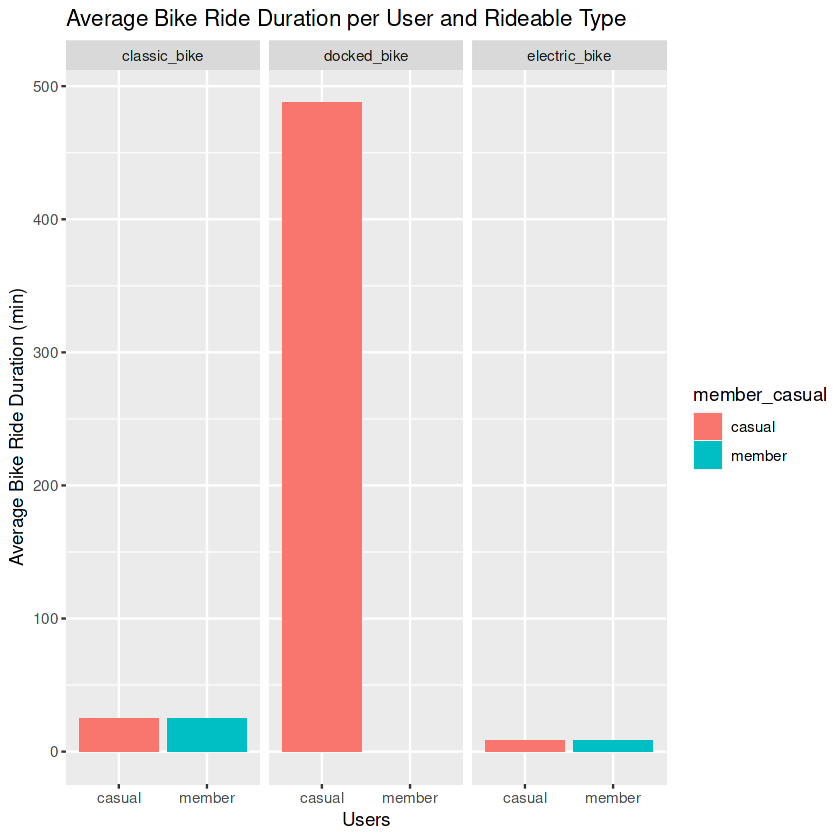

In [77]:
#Plot5 is average bike ride duration per user and rideable type 
  ggplot(Total_trips,
    
       aes(x = member_casual, y = ride_length/60, fill = member_casual)) + 
  geom_col(position = "dodge") +
  labs(x = "Users", y = "Average Bike Ride Duration (min)", title = "Average Bike Ride Duration per User and Rideable Type") +
  facet_wrap(~rideable_type) 
  